# Hello world on a 2-qubit Bell state

### Step 1: Map the problem to circuits and operators

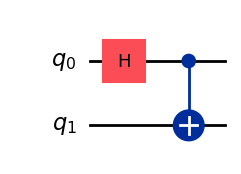

In [80]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)  # Hadamard gate to qubit 0
qc.cx(0, 1)  # CNOT gate between 0 and 1 qubit

qc.draw(output='mpl')

In [81]:
# Let's verify the initial state using Qiskit's statevector simulator
from qiskit.quantum_info import Statevector

# For a 2-qubit system QuantumCircuit(2)
qc_init = QuantumCircuit(2)
initial_state = Statevector.from_instruction(qc_init)

print("Initial state vector for 2 qubits:")
print(f"State: {initial_state}")
print(f"In computational basis: |00⟩ with amplitude 1.0")
print(f"Probabilities: {initial_state.probabilities()}")
print(f"This corresponds to: |00⟩: 100%, |01⟩: 0%, |10⟩: 0%, |11⟩: 0%")

Initial state vector for 2 qubits:
State: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
In computational basis: |00⟩ with amplitude 1.0
Probabilities: [1. 0. 0. 0.]
This corresponds to: |00⟩: 100%, |01⟩: 0%, |10⟩: 0%, |11⟩: 0%


This confirms that QuantumCircuit(n) initializes all n qubits to |0⟩, giving you the n=2 qubit |00⟩ state with 100% probability! \
Thus,

- **Initial state**: 
    - |00⟩ (both qubits in state 0)
- **Hadamard gate** on qubit 0:
    - The Hadamard gate puts qubit 0 into superposition of 0 and 1
State becomes: (|00⟩ + |10⟩)/√2
- **CNOT** gate:
    - CNOT flips qubit 1 if qubit 0 is |1⟩
    - Final state: (|00⟩ + |11⟩)/√2

In [82]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Understanding Pauli Operators

Pauli operators are fundamental quantum operators. For 2-qubit systems:

- **Single qubit Paulis**: I, X, Y, Z
- **Two-qubit combinations**: We use tensor products like ZZ, ZI, IZ, XX, etc.

**What they measure:**
- **Z operators**: Measure in computational basis (|0⟩/|1⟩)
- **X operators**: Measure in superposition basis (|+⟩/|-⟩)  
- **Y operators**: Measure in circular basis

These observables help us characterize quantum states and measure different properties of our Bell state.

In [ ]:
# Let's see what these Pauli operators actually look like as matrices
print("Single qubit Pauli operators:")
print("I (Identity):")
print(Pauli('I').to_matrix())
print("\nX (Bit flip):")
print(Pauli('X').to_matrix())
print("\nY (Bit+Phase flip):")
print(Pauli('Y').to_matrix())
print("\nZ (Phase flip):")
print(Pauli('Z').to_matrix())

print("="*50)
print("Two-qubit Pauli operators (examples):")
print("ZZ (Z on both qubits):")
print(ZZ.to_matrix())
print("\nXX (X on both qubits):")
print(XX.to_matrix())

In [83]:
# Let's see how Pauli operators act on quantum states
import numpy as np

print("How Pauli operators transform quantum states:")
print("="*50)

# Start with |0⟩ state
state_0 = Statevector([1, 0])
print(f"Initial state |0⟩: {state_0}")

# Apply X gate (bit flip)
state_after_X = state_0.evolve(Pauli('X'))
print(f"After X gate: {state_after_X} (this is |1⟩)")

# Apply Z gate to |1⟩ (phase flip)  
state_1 = Statevector([0, 1])
state_after_Z = state_1.evolve(Pauli('Z'))
print(f"|1⟩ after Z gate: {state_after_Z} (this is -|1⟩)")

print("\n" + "="*50)
print("For our Bell state (|00⟩ + |11⟩)/√2:")

# Create Bell state
bell_state = Statevector([(1/np.sqrt(2)), 0, 0, (1/np.sqrt(2))])
print(f"Bell state: {bell_state}")

# Apply ZZ measurement (Z on both qubits)
expectation_ZZ = bell_state.expectation_value(ZZ)
print(f"⟨ZZ⟩ expectation value: {expectation_ZZ}")

# Apply XX measurement  
expectation_XX = bell_state.expectation_value(XX)
print(f"⟨XX⟩ expectation value: {expectation_XX}")

How Pauli operators transform quantum states:
Initial state |0⟩: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
After X gate: Statevector([0.+0.j, 1.+0.j],
            dims=(2,)) (this is |1⟩)
|1⟩ after Z gate: Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,)) (this is -|1⟩)

For our Bell state (|00⟩ + |11⟩)/√2:
Bell state: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
⟨ZZ⟩ expectation value: 0.9999999999999998
⟨XX⟩ expectation value: 0.9999999999999998


### Step 2: Optimize

### Step 3: Execute on the backend

In [84]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables) # [qc] * len(observables) to create a list of circuits, one for each observable

results = job.result()

## What is the Estimator?

The `Estimator` is a Qiskit **primitive** - a high-level interface for quantum computations.

**What `estimator = Estimator()` does:**
- Creates an **instance/object** of the Estimator class
- This object inherits all methods from the Estimator class
- Provides access to functions like `.run()` to execute quantum circuits

**What the Estimator primitive does:**
- Calculates **expectation values** ⟨ψ|O|ψ⟩ of observables O on quantum states |ψ⟩
- Runs quantum circuits on backends (simulators or real quantum hardware)
- Returns statistical estimates of how quantum states behave under different measurements

In [ ]:
# print(type(results.values))
print(results.values)
# print(type(results.metadata))
print(results.metadata)

In [85]:
# Mathematical Analysis of Bell State Expectation Values
print("="*60)
print("MATHEMATICAL ANALYSIS: Bell State Expectation Values")
print("="*60)

# Our Bell state: (|00⟩ + |11⟩)/√2
bell_state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
print(f"Bell state |ψ⟩ = (|00⟩ + |11⟩)/√2")
print(f"State vector: {bell_state}")

print("\n" + "="*50)
print("PAULI OPERATOR MATRICES:")
print("="*50)

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')  
IZ = Pauli('IZ')

print("ZZ operator matrix:")
print(ZZ.to_matrix())
print("\nZI operator matrix:")
print(ZI.to_matrix())
print("\nIZ operator matrix:")
print(IZ.to_matrix())

print("\n" + "="*50)
print("EXPECTATION VALUE CALCULATIONS:")
print("="*50)

# ZZ expectation value calculation
print("1. ⟨ZZ⟩ Expectation Value:")
print("   ZZ|00⟩ = Z⊗Z|00⟩ = |00⟩ (eigenvalue +1)")
print("   ZZ|11⟩ = Z⊗Z|11⟩ = (-1)(-1)|11⟩ = +1|11⟩ (eigenvalue +1)")
print("   ⟨ψ|ZZ|ψ⟩ = ⟨(|00⟩+|11⟩)/√2|ZZ|(|00⟩+|11⟩)/√2⟩")
print("   = (1/2)[⟨00|ZZ|00⟩ + ⟨00|ZZ|11⟩ + ⟨11|ZZ|00⟩ + ⟨11|ZZ|11⟩]")
print("   = (1/2)[1×1 + 0 + 0 + 1×1] = 1")

zz_expectation = bell_state.expectation_value(ZZ)
print(f"   Calculated: {zz_expectation}")

print("\n2. ⟨ZI⟩ Expectation Value:")
print("   ZI = Z⊗I (Z on qubit 0, Identity on qubit 1)")
print("   ZI|00⟩ = |00⟩ (eigenvalue +1)")
print("   ZI|11⟩ = -|11⟩ (eigenvalue -1)")
print("   ⟨ψ|ZI|ψ⟩ = (1/2)[⟨00|ZI|00⟩ + ⟨11|ZI|11⟩]")
print("   = (1/2)[1×1 + 1×(-1)] = 0")

zi_expectation = bell_state.expectation_value(ZI)
print(f"   Calculated: {zi_expectation}")

print("\n3. ⟨IZ⟩ Expectation Value:")
print("   IZ = I⊗Z (Identity on qubit 0, Z on qubit 1)")
print("   IZ|00⟩ = |00⟩ (eigenvalue +1)")
print("   IZ|11⟩ = -|11⟩ (eigenvalue -1)")
print("   ⟨ψ|IZ|ψ⟩ = (1/2)[⟨00|IZ|00⟩ + ⟨11|IZ|11⟩]")
print("   = (1/2)[1×1 + 1×(-1)] = 0")

iz_expectation = bell_state.expectation_value(IZ)
print(f"   Calculated: {iz_expectation}")

print("\n" + "="*50)
print("PHYSICAL INTERPRETATION:")
print("="*50)
print("• ⟨ZZ⟩ = 1: The qubits have PERFECT CORRELATION")
print("  Both qubits always have the same Z measurement outcome")
print("• ⟨ZI⟩ = 0: Qubit 0 alone shows NO BIAS")
print("  Equal probability of measuring +1 or -1")
print("• ⟨IZ⟩ = 0: Qubit 1 alone shows NO BIAS")
print("  Equal probability of measuring +1 or -1")
print("\nThis is the signature of QUANTUM ENTANGLEMENT!")

MATHEMATICAL ANALYSIS: Bell State Expectation Values
Bell state |ψ⟩ = (|00⟩ + |11⟩)/√2
State vector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

PAULI OPERATOR MATRICES:
ZZ operator matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

ZI operator matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

IZ operator matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

EXPECTATION VALUE CALCULATIONS:
1. ⟨ZZ⟩ Expectation Value:
   ZZ|00⟩ = Z⊗Z|00⟩ = |00⟩ (eigenvalue +1)
   ZZ|11⟩ = Z⊗Z|11⟩ = (-1)(-1)|11⟩ = +1|11⟩ (eigenvalue +1)
   ⟨ψ|ZZ|ψ⟩ = ⟨(|00⟩+|11⟩)/√2|ZZ|(|00⟩+|11⟩)/√2⟩
   = (1/2)[⟨00|ZZ|00⟩ + ⟨00|ZZ|11⟩ + ⟨11|ZZ|00⟩ + ⟨11|ZZ|11⟩

In [ ]:
# Analysis of X-based Pauli operators on Bell State
print("\n" + "="*60)
print("X-BASED PAULI OPERATORS ANALYSIS")
print("="*60)

XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

print("X-based operator matrices:")
print("XX (X on both qubits):")
print(XX.to_matrix())
print("\nXI (X on qubit 0, Identity on qubit 1):")
print(XI.to_matrix())
print("\nIX (Identity on qubit 0, X on qubit 1):")
print(IX.to_matrix())

print("\n" + "="*50)
print("HOW X OPERATORS TRANSFORM BASIS STATES:")
print("="*50)
print("X operator transforms:")
print("X|0⟩ = |1⟩")
print("X|1⟩ = |0⟩")
print()
print("For our Bell state basis states:")
print("XX|00⟩ = X⊗X|00⟩ = |11⟩")
print("XX|11⟩ = X⊗X|11⟩ = |00⟩")
print()
print("XI|00⟩ = X⊗I|00⟩ = |10⟩")
print("XI|11⟩ = X⊗I|11⟩ = |01⟩")
print()
print("IX|00⟩ = I⊗X|00⟩ = |01⟩")
print("IX|11⟩ = I⊗X|11⟩ = |10⟩")

print("\n" + "="*50)
print("EXPECTATION VALUE CALCULATIONS:")
print("="*50)

# Bell state: (|00⟩ + |11⟩)/√2
bell_state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

print("Bell state: |ψ⟩ = (|00⟩ + |11⟩)/√2")
print()

# XX expectation value
print("1. ⟨XX⟩ Expectation Value:")
print("   XX|00⟩ = |11⟩")
print("   XX|11⟩ = |00⟩")
print("   XX|ψ⟩ = XX[(|00⟩ + |11⟩)/√2] = (|11⟩ + |00⟩)/√2 = |ψ⟩")
print("   ⟨ψ|XX|ψ⟩ = ⟨ψ|ψ⟩ = 1")

xx_expectation = bell_state.expectation_value(XX)
print(f"   Calculated: {xx_expectation}")

print("\n2. ⟨XI⟩ Expectation Value:")
print("   XI|00⟩ = |10⟩")
print("   XI|11⟩ = |01⟩")
print("   XI|ψ⟩ = XI[(|00⟩ + |11⟩)/√2] = (|10⟩ + |01⟩)/√2")
print("   ⟨ψ|XI|ψ⟩ = ⟨(|00⟩ + |11⟩)/√2|(|10⟩ + |01⟩)/√2⟩")
print("   = (1/2)[⟨00|10⟩ + ⟨00|01⟩ + ⟨11|10⟩ + ⟨11|01⟩]")
print("   = (1/2)[0 + 0 + 0 + 0] = 0")

xi_expectation = bell_state.expectation_value(XI)
print(f"   Calculated: {xi_expectation}")

print("\n3. ⟨IX⟩ Expectation Value:")
print("   IX|00⟩ = |01⟩")
print("   IX|11⟩ = |10⟩")
print("   IX|ψ⟩ = IX[(|00⟩ + |11⟩)/√2] = (|01⟩ + |10⟩)/√2")
print("   ⟨ψ|IX|ψ⟩ = ⟨(|00⟩ + |11⟩)/√2|(|01⟩ + |10⟩)/√2⟩")
print("   = (1/2)[⟨00|01⟩ + ⟨00|10⟩ + ⟨11|01⟩ + ⟨11|10⟩]")
print("   = (1/2)[0 + 0 + 0 + 0] = 0")

ix_expectation = bell_state.expectation_value(IX)
print(f"   Calculated: {ix_expectation}")

print("\n" + "="*50)
print("PHYSICAL INTERPRETATION OF X-OPERATORS:")
print("="*50)
print("• ⟨XX⟩ = 1: Perfect correlation in X-basis measurements")
print("  If we measure both qubits in |+⟩/|-⟩ basis, outcomes are perfectly correlated")
print("• ⟨XI⟩ = 0: No correlation between X-measurement of qubit 0 and Z-measurement of qubit 1")
print("• ⟨IX⟩ = 0: No correlation between Z-measurement of qubit 0 and X-measurement of qubit 1")
print()
print("KEY INSIGHT: The Bell state shows perfect correlation in BOTH Z and X bases!")
print("This is impossible classically - it's a signature of quantum entanglement.")

print("\n" + "="*50)
print("SUMMARY OF ALL EXPECTATION VALUES:")
print("="*50)
print(f"⟨ZZ⟩ = {bell_state.expectation_value(Pauli('ZZ'))}")
print(f"⟨ZI⟩ = {bell_state.expectation_value(Pauli('ZI'))}")
print(f"⟨IZ⟩ = {bell_state.expectation_value(Pauli('IZ'))}")
print(f"⟨XX⟩ = {bell_state.expectation_value(Pauli('XX'))}")
print(f"⟨XI⟩ = {bell_state.expectation_value(Pauli('XI'))}")
print(f"⟨IX⟩ = {bell_state.expectation_value(Pauli('IX'))}")

#### Note: However in my calculation results I donot observe exact 0 values for IZ,ZI,XI,IX operators even though when I observe exactly 1. for XX and ZZ operators

In [ ]:
print("\n" + "="*50)
print("WHY NO NOISE FOR ZZ AND XX BUT NOISE FOR OTHERS?")
print("="*50)

print("Your results: [1.0, 0.012, 0.012, 1.0, -0.006, -0.006]")
print("Observables: [ZZ,  ZI,   IZ,   XX,  XI,    IX]")
print()

print("KEY INSIGHT: The noise pattern reveals the Bell state structure!")
print()

print("1. ZZ and XX = 1.0 EXACTLY (no noise):")
print("   • These operators are EIGENOPERATORS of the Bell state")
print("   • Bell state is an eigenstate with eigenvalue +1")
print("   • No statistical uncertainty when measuring eigenvalues!")
print()

print("2. ZI, IZ, XI, IX ≈ 0 WITH NOISE:")
print("   • These operators are NOT eigenoperators")
print("   • They create superposition of measurement outcomes")
print("   • Statistical sampling creates uncertainty around the mean")
print()

print("MATHEMATICAL EXPLANATION:")
print("="*30)
print("Bell state: |ψ⟩ = (|00⟩ + |11⟩)/√2")
print()

print("ZZ operator:")
print("ZZ|00⟩ = +1|00⟩  (eigenvalue +1)")
print("ZZ|11⟩ = +1|11⟩  (eigenvalue +1)")
print("→ Bell state is eigenstate of ZZ with eigenvalue +1")
print("→ EVERY measurement gives +1 → NO NOISE")
print()

print("XX operator:")
print("XX|00⟩ = |11⟩")
print("XX|11⟩ = |00⟩")
print("XX|ψ⟩ = XX[(|00⟩ + |11⟩)/√2] = (|11⟩ + |00⟩)/√2 = |ψ⟩")
print("→ Bell state is eigenstate of XX with eigenvalue +1")
print("→ EVERY measurement gives +1 → NO NOISE")
print()

print("ZI operator (example of noisy case):")
print("ZI|00⟩ = +1|00⟩")
print("ZI|11⟩ = -1|11⟩")
print("→ Bell state is NOT eigenstate of ZI")
print("→ Measurements give +1 or -1 with equal probability")
print("→ Average = 0, but individual shots vary → STATISTICAL NOISE")
print()

print("CONCLUSION:")
print("• Perfect eigenvalue measurements (ZZ, XX) → No noise")
print("• Statistical averaging (ZI, IZ, XI, IX) → Noise from finite sampling")
print("• This is fundamental quantum measurement theory!")

### Step 4: Post Processing (and plotting)

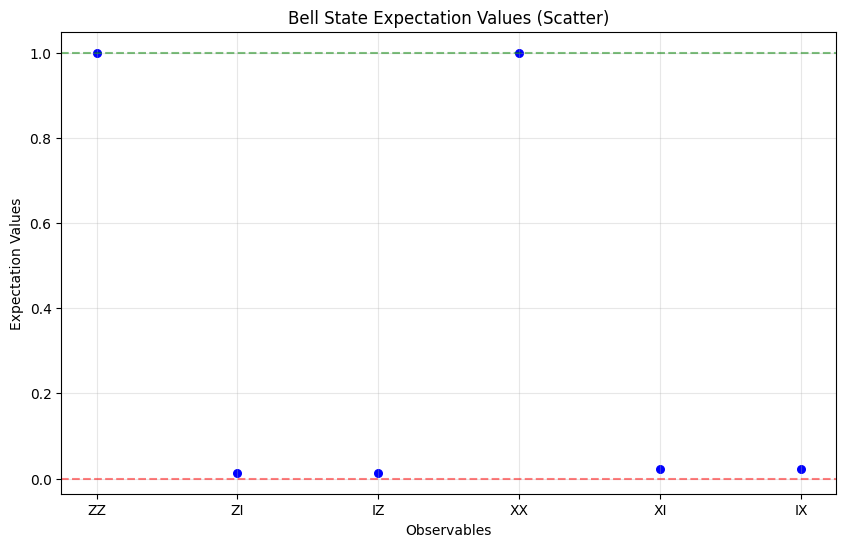

In [86]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX'] # observables = [ZZ, ZI, IZ, XX, XI, IX]
values = results.values

plt.figure(figsize=(10, 6))
plt.scatter(data, values, s=30, c='blue')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.title('Bell State Expectation Values (Scatter)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='g', linestyle='--', alpha=0.5)
plt.show()

In [87]:
print(results.values)

[1.         0.01367188 0.01367188 1.         0.02148438 0.02148438]


# Expand the Hello World example to $n$-qubit GHZ state

### Step 1: Map the problem to the curcuit and operators 

In [ ]:
def n_qubit_qauntum_circuit_constructor(n:int):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc_n = n_qubit_qauntum_circuit_constructor(n)
# qc_n.draw(output='mpl')

In [41]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n - 2 - i) for i in range(n-1)]
# print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]


99


### Step 2: Optimize the problem for quantum execution

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_sherbrooke"  # or "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc_n)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators] # Makes sure that the indicies of the operators gets mapped to the correct indices of the transpiled circuit

/var/folders/jw/qfndg2hx5ss2hmqy__2xhv3w0000gn/T/ipykernel_10709/1260668932.py:5: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [88]:
# Uncomment these to see what transpilation does
print("="*60)
print("TRANSPILATION ANALYSIS: Before vs After")
print("="*60)

print("ORIGINAL CIRCUIT:")
print(f"Original circuit depth: {qc_n.depth()}")
print(f"Original gate count: {qc_n.count_ops()}")
print(f"Original qubits: {qc_n.num_qubits}")
print(f"First few gates: {list(qc_n.data)[:5]}")  # Show first 5 gates

print("\nTRANSPILED CIRCUIT:")
print(f"Transpiled circuit depth: {qc_transpiled.depth()}")
print(f"Transpiled gate count: {qc_transpiled.count_ops()}")
print(f"Transpiled qubits: {qc_transpiled.num_qubits}")
# print(f"Layout: {qc_transpiled.layout}")
print(f"First few gates: {list(qc_transpiled.data)[:5]}")

print("\n" + "="*50)
print("OPERATOR TRANSPILATION:")
print("="*50)

print("Original operator (third one):")
print(f"Original: {operators[2]}")
print(f"Qubits: {operators[2].num_qubits}")

print("\nTranspiled operator (third one):")
print(f"Transpiled: {operators_transpiled_list[2]}")
print(f"Qubits: {operators_transpiled_list[2].num_qubits}")

# Show the difference in detail
print("\n" + "="*50)
print("WHAT TRANSPILATION CHANGED:")
print("="*50)

print("1. QUBIT MAPPING:")
print(f"   • Original uses logical qubits 0, 1, 2, ..., {n-1}")
print(f"   • Transpiled maps to physical qubits on the hardware")
# print(f"   • Layout information: {qc_transpiled.layout}")

print("\n2. GATE DECOMPOSITION:")
print("   • Original: H and CNOT gates")
print("   • Transpiled: Hardware-native gates (RZ, SX, CNOT, etc.)")

print("\n3. CONNECTIVITY ROUTING:")
print("   • Added SWAP gates for non-adjacent qubit operations")
print("   • Optimized for hardware topology")

print("\n4. OPERATOR LAYOUT APPLICATION:")
print("   • Original operators act on logical qubits")
print("   • Transpiled operators act on mapped physical qubits")

TRANSPILATION ANALYSIS: Before vs After
ORIGINAL CIRCUIT:
Original circuit depth: 100
Original gate count: OrderedDict({'cx': 99, 'h': 1})
Original qubits: 100
First few gates: [CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(100, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(100, "q"), index=0>, <Qubit register=(100, "q"), index=1>), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(100, "q"), index=1>, <Qubit register=(100, "q"), index=2>), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(100, "q"), index=2>, <Qubit register=(100, "q"), index=3>), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qub

### Step 3: Execute on the backend

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1 # Since Quantum computers are extremely noisy this step allows for Error Mitigation
# options.optimization_level = 0 ## removed in the updated versions
options.dynamical_decoupling.enable = True # Applies rapid pulse sequences during idle times to combat decoherence.
options.dynamical_decoupling.sequence_type = 'XY4' # X-pulse, Y-pulse, X-pulse, Y-pulse; 4-pulse sequence

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

d1fwhkev3z50008ayhyg


/Users/soni_aman/anaconda3/envs/cwq/lib/python3.13/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1111: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


### Step 4: Post-process and plot

In [92]:
# Retrieve the job
job = service.job(job_id)

In [93]:
data = list(range(1,n))
# print(len(data))
result = job.result()[0]
values = result.data.evs

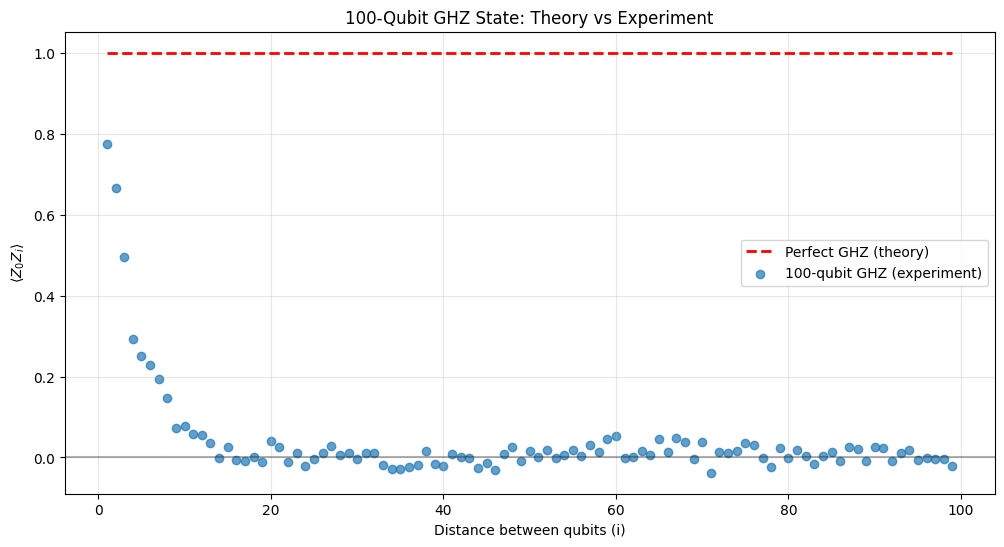

In [103]:
plt.figure(figsize=(12, 6))

# Theoretical perfect GHZ
theoretical = [1.0] * 99
plt.plot(range(1, 100), theoretical, 'r--', label='Perfect GHZ (theory)', linewidth=2)

# Your experimental results  
plt.scatter(data, values, marker='o', label=f'{n}-qubit GHZ (experiment)', alpha=0.7)

plt.xlabel('Distance between qubits (i)')
plt.ylabel(r'$\langle Z_0 Z_i \rangle$')
plt.title('100-Qubit GHZ State: Theory vs Experiment')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

Plot 2

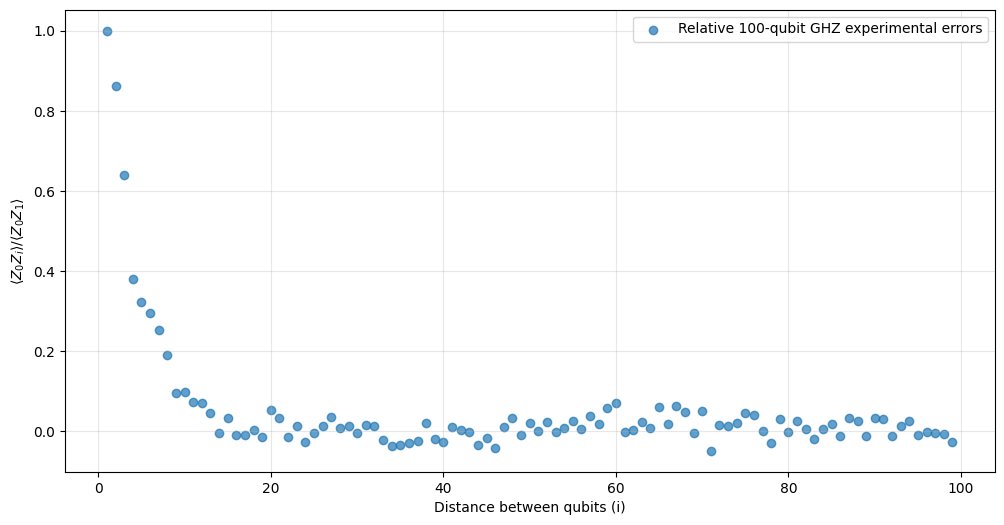

In [104]:
rel_values = [values_i / values[0] for values_i in values]

plt.figure(figsize=(12, 6))
plt.scatter(data, rel_values, marker='o', label=f'Relative {n}-qubit GHZ experimental errors', alpha=0.7)

plt.xlabel('Distance between qubits (i)')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Decoherence Affects Distance:

**Ideal GHZ** \
|GHZ⟩ = (|00...0⟩ + |11...1⟩)/√2 \
ALL $Z_0 Z_i$ should give $⟨Z_0 Z_i⟩$ = +1

**Your GHZ** circuit construction: \
H(0) - CNOT(0,1) - CNOT(1,2) - CNOT(2,3) - ... - CNOT(98,99)

**CIRCUIT ANALYSIS**:
- Qubit 1: Directly connected to qubit 0 → Strong correlation
- Qubit 2: Connected via 1 CNOT → Medium correlation
- Qubit 99: Connected via 99 CNOTs → Weak correlation

**DECOHERENCE TIMELINE**:
- Early gates (0-1): Less time for decoherence → Higher fidelity
- Late gates (0-99): More time for decoherence → Lower fidelity

Decoherence is quantum information leaking into the environment, destroying the delicate quantum correlations that make quantum computing powerful. This experiment beautifully demonstrates this effect!